# CODE TO DETECT SPAM E-MAILS USING NAIVE BAYES

# PROBLEM STATEMENT

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

![image.png](attachment:image.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
spam_df = pd.read_csv("emails.csv")

In [3]:
spam_df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
spam_df.tail(5)

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
spam_df.shape

(5728, 2)

In [6]:
spam_df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [7]:
spam_df.dtypes

text    object
spam     int64
dtype: object

In [8]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Visualization of Dataset

In [9]:
ham = spam_df[spam_df['spam']==0]

In [10]:
spam = spam_df[spam_df['spam']==1]

In [11]:
print('spam percentage=', len(spam)/len(spam_df)*100,'%')

spam percentage= 23.88268156424581 %


In [12]:
print('hm percentage=', len(ham)/len(spam_df)*100,'%')

hm percentage= 76.11731843575419 %


<AxesSubplot:xlabel='spam', ylabel='count'>

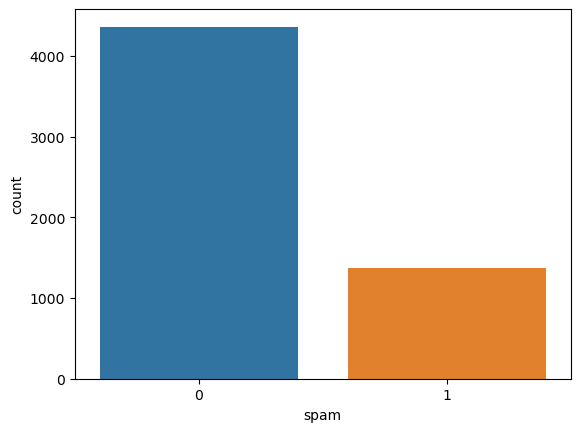

In [13]:
sns.countplot(x=spam_df['spam'], label='Count Spam vs Ham')

# Vectorization

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [16]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzn', 'zzncacst', 'zzzz'], dtype=object)

In [17]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
spamham_countvectorizer.shape

(5728, 37303)

# Model Training

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
label = spam_df['spam'].values

In [21]:
NB_classifier = MultinomialNB()

In [22]:
#split the data into train and test
from sklearn.model_selection import train_test_split

In [23]:
X = spamham_countvectorizer
y = label

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# Evaluation of Model

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [28]:
y_test_predict = NB_classifier.predict(X_test)

<AxesSubplot:>

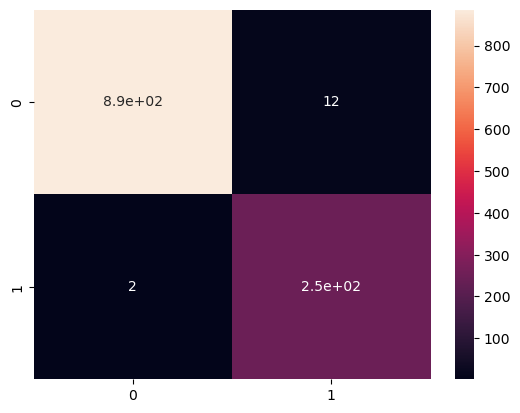

In [31]:
sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True)

In [36]:
print('The model test accuracy is:',accuracy_score(y_test, y_test_predict)*100)

The model test accuracy is: 98.77835951134381


In [37]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       898
           1       0.95      0.99      0.97       248

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

